In [11]:
import numpy as np
import time
from math import inf
import matplotlib.pyplot as plt
import random

In [12]:
# A_star algorithm with admissibiliy
class vertex_maker:
    def __init__(self, node):
        self.id = node
        self.adjacent = {}
        self.g_score = inf
        self.f_score = inf
        self.prev = None
        self.heuristic = None
        self.row = None
        self.col = None

    def add_neighbor(self, neighbor, weight=0):
        self.adjacent[neighbor] = weight
        
    def get_weight(self, neighbor):
        return self.adjacent[neighbor]
    
class Graph_maker:
    def __init__(self):
        self.vert_dict = {}
        self.open_lst = {}
        self.closed_lst = []
        
    def add_vertex(self, node):
        new_node = vertex_maker(node)
        self.vert_dict[node] = new_node
    
    def add_edges(self, frm, to, cost=0):
        self.vert_dict[frm].add_neighbor(self.vert_dict[to], cost)
        self.vert_dict[to].add_neighbor(self.vert_dict[frm], cost)

# calculate heuristic
def heuristic(frm, to):
    return np.sqrt((frm.row-to.row)**2 + (frm.col-to.col)**2)

# define graph        
g = Graph_maker()

# add vertex
# 10x10 grid vertex
for i in range(100):
    g.add_vertex(i)

# add position to vertex
for i in range(10):
    for j in range(10):
        g.vert_dict[10*i+j].row = i
        g.vert_dict[10*i+j].col = j

# add cost btw vertx
for j in range(1,9):
    for i in range(1,9):
        g.add_edges(10*j+i, 10*j+i-10, 1)
        g.add_edges(10*j+i, 10*j+i-1,  1)
        g.add_edges(10*j+i, 10*j+i+1,  1)
        g.add_edges(10*j+i, 10*j+i+10, 1)

for i in range(9):
    g.add_edges(i, i+1, 1) # 1st row
    g.add_edges(90+i, 90+i+1, 1) # 10th row
    g.add_edges(i*10,(i+1)*10, 1) # 1st column
    g.add_edges(i*10+9,(i+1)*10+9, 1) # 10th column

In [13]:
def obstacle_gen(num, start, target):
    print(">>> Obstacle nodes")
    del_node_list = []
    while len(del_node_list) != num:
        node = random.randint(0,99)
        if start == node: continue
        if target == node: continue
        if node in del_node_list: continue
        del_node_list.append(node)

        print(node, end=" ")

        # plot obstacle
        node_self = g.vert_dict[node]
        plt.plot(node_self.row, node_self.col, "ks", markersize=40)

        # delete the link from near node
        try:
            del g.vert_dict[node-1].adjacent[node_self]
        except KeyError:
            pass
        try:
            del g.vert_dict[node+1].adjacent[node_self]
        except KeyError:
            pass
        try:
            del g.vert_dict[node+10].adjacent[node_self]
        except KeyError:
            pass
        try:
            del g.vert_dict[node-10].adjacent[node_self]
        except KeyError:
            pass 

        # delete node itself
        del g.vert_dict[node]

In [14]:
def a_star(g, start, target, num_obstacle):
    try:
        # Initialize for implementation
        for i in g.vert_dict.values():
            i.visited = False
            i.g_score = inf
            i.f_score = inf

        start = g.vert_dict[start]
        target = g.vert_dict[target]

        # plot grid
        plt.figure(figsize=(6,6))
        plt.xlim(-1,10)
        plt.ylim(-1,10)
        plt.grid()
        plt.plot(start.row, start.col, "ko")

        # generate obstacle
        obstacle_gen(num_obstacle, start.id, target.id)

        start_time = time.time()

        # Initialize start node
        start.g_score = 0
        start.f_score = start.g_score + heuristic(start, target)
        start.prev = -1
        g.closed_lst.append(start)

        current = start
        state = 0

        while target not in g.closed_lst:        
            state += 1
            for near_vtx, near_vtx_cost in current.adjacent.items():
                if near_vtx in g.closed_lst: continue 
                # update g_score
                if near_vtx.g_score > current.g_score + near_vtx_cost:
                    near_vtx.g_score = current.g_score + near_vtx_cost
                # update f_score
                new_f_score = current.g_score + near_vtx_cost + heuristic(near_vtx, target)
                if near_vtx.f_score > new_f_score:
                    near_vtx.f_score = new_f_score
                    near_vtx.prev = current
                    g.open_lst[near_vtx] = near_vtx.f_score

            # Choose the next node
            candidate = []
            for v in g.open_lst.values():
                candidate.append(v)
            min_f_score = min(candidate)
            for k,v in g.open_lst.items():
                if v == min_f_score:
                    current = k
                    break
            del g.open_lst[current]
            g.closed_lst.append(current)
            plt.plot(current.row, current.col, "bo")

        execution_time = time.time() - start_time    

        # shortest path
        path_node = current
        path = [path_node.id]
        plt.plot(path_node.row, path_node.col, "rs")      
        while path_node != start:
            path_node = path_node.prev
            path.append(path_node.id)
            plt.plot(path_node.row, path_node.col, "rs")
        path.reverse()   

        print("\n")
        print(">>> Shortest Path from {} to {} is:".format(start.id, target.id), path, "\n"
              ">>> distance cost is:", current.f_score)
        print(">>> #iteration: ", state)    
        print(">>> execution time: ",execution_time)
    
    except ValueError:
        print("\n")
        print(">>> Impossible to generate path")
        print(">>> Try again")

>>> Obstacle nodes
93 74 3 56 98 60 4 97 77 31 6 71 41 67 63 92 14 47 75 50 

>>> Shortest Path from 0 to 99 is: [0, 1, 11, 12, 22, 23, 33, 34, 44, 45, 55, 65, 66, 76, 86, 87, 88, 89, 99] 
>>> distance cost is: 18.0
>>> #iteration:  66
>>> execution time:  0.08616232872009277


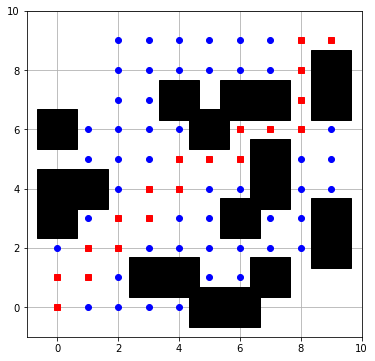

In [15]:
# a_star(Graph, start, target, #obstacle)
a_star(g, 0, 99, 20)